In [3]:
import pandas as pd

Datafilename = r'H:\dataset\WorldBank\API_19_DS2_en_csv_v2_5361599.csv'
dataset = pd.read_csv(Datafilename, skiprows=4)

# Print out the unique values of the 'Indicator Code' column
print(dataset['Indicator Name'].unique())

# Define the indicators and countries of interest
indicators = ['Urban population', 'Population, total']
countries = ['United States', 'China', 'India']

# Check if the specified indicators are present in the dataset
if not set(indicators).issubset(set(dataset['Indicator Name'].unique())):
    raise ValueError("Specified indicators are not present in the dataset")

# Subset the data for the indicators and countries of interest
sub_set = dataset[(dataset['Country Name'].isin(countries)) & (dataset['Indicator Name'].isin(indicators))]
sub_set = sub_set[['Country Name', 'Indicator Name', '2019']]

# Rename columns to match indicators
sub_set = sub_set.rename(columns={'Indicator Name': 'Indicator', '2019': 'Value'})

# Pivot the data to create separate columns for each indicator
sub_set = sub_set.pivot(index='Country Name', columns='Indicator', values='Value')

# Compute summary statistics for the whole world
world_stats = sub_set.describe()

# Compute summary statistics for each country
country_stats = subset.describe()

# Print the summary statistics
print("Summary statistics for the whole world:")
print(world_stats)

print("\nSummary statistics for each country:")
print(country_stats)

['Urban population (% of total population)' 'Urban population'
 'Urban population growth (annual %)' 'Population, total'
 'Population growth (annual %)'
 'Poverty headcount ratio at $2.15 a day (2017 PPP) (% of population)'
 'Prevalence of underweight, weight for age (% of children under 5)'
 'Community health workers (per 1,000 people)'
 'Mortality rate, under-5 (per 1,000 live births)'
 'Primary completion rate, total (% of relevant age group)'
 'School enrollment, primary and secondary (gross), gender parity index (GPI)'
 'Agriculture, forestry, and fishing, value added (% of GDP)'
 'CPIA public sector management and institutions cluster average (1=low to 6=high)'
 'Ease of doing business rank (1=most business-friendly regulations)'
 'Terrestrial and marine protected areas (% of total territorial area)'
 'Marine protected areas (% of territorial waters)'
 'Terrestrial protected areas (% of total land area)'
 'Annual freshwater withdrawals, total (% of internal resources)'
 'Annual f

In [4]:
import pandas as pd

# Read data from a CSV file into a DataFrame
dataset = pd.read_csv('H:\dataset\WorldBank\API_19_DS2_en_csv_v2_5361599.csv')

# Use describe() method to get summary statistics of the data
print(dataset.describe())

         Unnamed: 4    Unnamed: 5    Unnamed: 6    Unnamed: 7    Unnamed: 8  \
count  2.495000e+03  4.090000e+03  4.124000e+03  4.140000e+03  4.181000e+03   
mean   2.532608e+07  1.641231e+07  1.706648e+07  1.819740e+07  1.875965e+07   
std    1.976134e+08  1.663111e+08  1.757116e+08  1.921350e+08  1.998806e+08   
min   -3.667000e+00 -3.667000e+00 -3.667000e+00 -3.703670e+02 -3.667000e+00   
25%    4.035723e+00  3.626166e+00  3.667000e+00  3.698517e+00  3.667000e+00   
50%    5.717916e+01  4.294653e+01  4.313941e+01  4.323517e+01  4.316100e+01   
75%    2.005158e+04  2.265695e+03  2.326159e+03  2.330250e+03  2.330000e+03   
max    3.040000e+09  3.428000e+09  3.797000e+09  4.362000e+09  4.653000e+09   

         Unnamed: 9   Unnamed: 10   Unnamed: 11   Unnamed: 12   Unnamed: 13  \
count  4.212000e+03  4.218000e+03  4.223000e+03  4.234000e+03  4.240000e+03   
mean   1.948203e+07  2.186218e+07  2.269768e+07  2.430580e+07  2.565626e+07   
std    2.106741e+08  2.505555e+08  2.610100e+08  2.

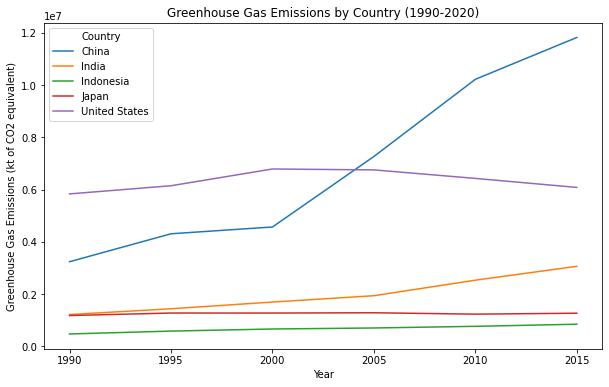

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset and subset to relevant indicators and countries
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)
df = df[df['Indicator Code'] == 'EN.ATM.GHGT.KT.CE']
countries = ['United States', 'China', 'India', 'Japan', 'South Korea', 'Indonesia']
df = df[df['Country Name'].isin(countries)]

# Subset to years 1990-2020 in five year increments
years = [str(year) for year in range(1990, 2021, 5)]
df = df.loc[:, ['Country Name'] + years]

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Value']
df = df.pivot(index='Year', columns='Country', values='Value')

# Plot the line graph
ax = df.plot(kind='line', figsize=(10,6))
ax.set_xlabel('Year')
ax.set_ylabel('Greenhouse Gas Emissions (kt of CO2 equivalent)')
ax.set_title('Greenhouse Gas Emissions by Country (1990-2020)')
plt.show()


<IPython.core.display.Javascript object>

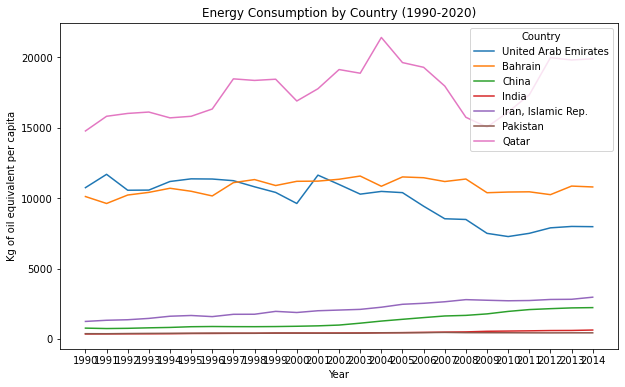

In [10]:
# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Select relevant indicators and countries
indicators = ['EG.USE.PCAP.KG.OE']
countries = ['United Arab Emirates', 'Qatar', 'Bahrain', 'Iran, Islamic Rep.', 'Pakistan','China', 'India']

# Subset the data
df = df[df['Indicator Code'].isin(indicators) & df['Country Name'].isin(countries)]
years = [str(year) for year in range(1990, 2015)]
df = df[['Country Name'] + years]  # Include relevant columns

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Energy Consumption']

# Plot the line graph for the selected countries
plt.figure(figsize=(10, 6))
sns.lineplot(data=df, x='Year', y='Energy Consumption', hue='Country')
plt.title('Energy Consumption by Country (1990-2020)')
plt.xlabel('Year')
plt.ylabel('Kg of oil equivalent per capita')
plt.show()


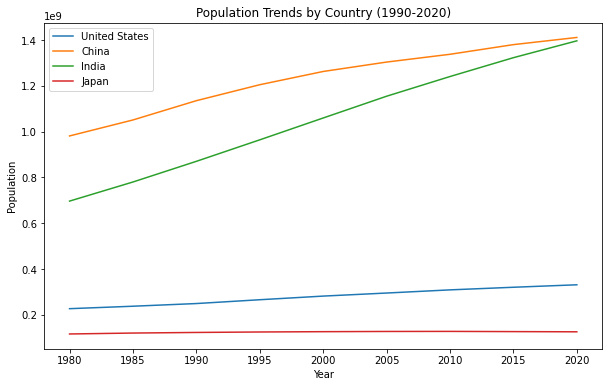

In [17]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to population data
df = df[df['Indicator Code'] == 'SP.POP.TOTL']
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan','Pakistan'])]

# Subset to years 1990-2020 in five year increments
years = [str(year) for year in range(1980, 2021, 5)]
df = df.loc[:, ['Country Name'] + years]

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Country Name').stack().reset_index()
df.columns = ['Country', 'Year', 'Population']

# Create a line graph for each country
fig, ax = plt.subplots(figsize=(10, 6))
for country in ['United States', 'China', 'India', 'Japan']:
    country_data = df[df['Country'] == country]
    ax.plot(country_data['Year'], country_data['Population'], label=country)

ax.set_xlabel('Year')
ax.set_ylabel('Population')
ax.set_title('Population Trends by Country (1980-2020)')
ax.legend()
plt.show()


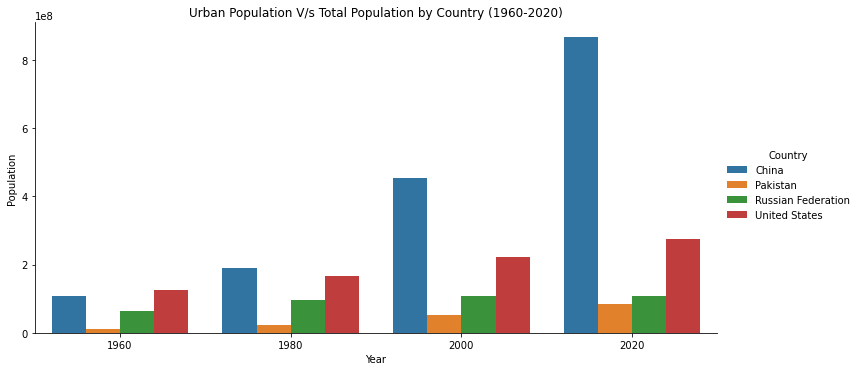

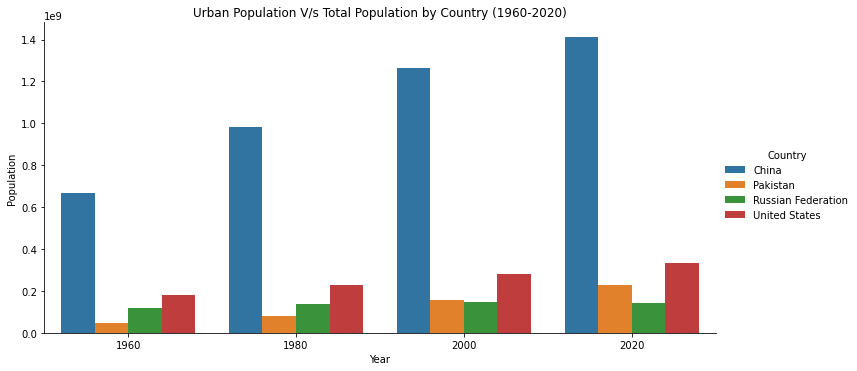

In [22]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to urban population and total population data
df = df[df['Indicator Code'].isin(['SP.URB.TOTL', 'SP.POP.TOTL'])]
df = df[df['Country Name'].isin(['United States', 'China', 'Pakistan', 'Russian Federation'])]

# Subset to years 1960-2020 in twenty year increments
years = list(range(1960, 2021, 20))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Population']

# Create a bar graph for each indicator and country
for indicator in ['SP.URB.TOTL', 'SP.POP.TOTL']:
    sns.catplot(data=df[df['Indicator'] == indicator], x='Year', y='Population', hue='Country',
                kind='bar', height=5, aspect=2)
    plt.title('Urban Population V/s Total Population by Country (1960-2020)')
    plt.xlabel('Year')
    plt.ylabel('Population')
    plt.show()


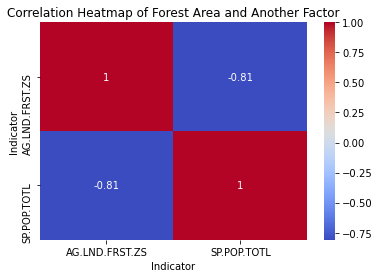

KeyError: "None of [Index(['Country Name', 'Indicator Code', '1990', '2010'], dtype='object')] are in the [columns]"

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to forest area and another factor of interest
df = df[df['Indicator Code'].isin(['AG.LND.FRST.ZS', 'SP.POP.TOTL'])]
df = df[df['Country Name'].isin(['United States', 'China', 'India', 'Japan'])]

# Subset to years 1960-2020 in twenty year increments
years = list(range(1960, 2021, 20))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator for each country
values_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Value')

# Calculate the correlation matrix for forest area and another factor
corr_matrix = values_pivot.corr()

# Create the heatmap for forest area and another factor
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Forest Area and Another Factor')
plt.show()

# Subset to years 1990-2020 in twenty year increments
years = list(range(1990, 2021, 20))
df = df.loc[:, ['Country Name', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Name', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator for each country
values_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Value')

# Calculate the correlation matrix for forest area
corr_matrix_forest = values_pivot['AG.LND.FRST.ZS'].corr()

# Create the heatmap for forest area
sns.heatmap(corr_matrix_forest, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Forest Area Trends')
plt.show()

# Calculate the correlation matrix for another factor
corr_matrix_factor = values_pivot['SP.POP.TOTL'].corr()

# Create the heatmap for another factor
sns.heatmap(corr_matrix_factor, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Another Factor Trends')
plt.xlabel('Forest Area')
plt.ylabel('Total Population')
plt.show()

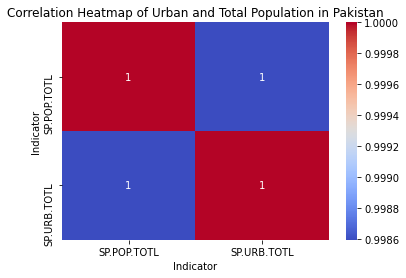

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to urban population and total population data for Pakistan
df = df[df['Indicator Code'].isin(['SP.URB.TOTL', 'SP.POP.TOTL'])]
df = df[df['Country Name'] == 'Pakistan']

# Subset to years 1960-2020 in 20 year increments
years = list(range(1960, 2021, 20))
df = df.loc[:, ['Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Indicator Code']).stack().reset_index()
df.columns = ['Indicator', 'Year', 'Population']

# Create a pivot table with population by year and indicator
pop_pivot = df.pivot(index='Year', columns='Indicator', values='Population')

# Calculate the correlation matrix
corr_matrix = pop_pivot.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Urban and Total Population in Pakistan')
plt.show()


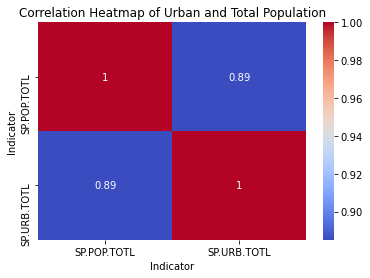

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to urban population and total population indicators
df = df[df['Indicator Code'].isin(['SP.URB.TOTL', 'SP.POP.TOTL'])]

# Subset to Pakistan, India, China, and Bangladesh
df = df[df['Country Code'].isin(['PAK', 'IND', 'CHN', 'BGD'])]

# Subset to years 1960-2020 in 20 year increments
years = list(range(1960, 2021, 20))
df = df.loc[:, ['Country Code', 'Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index(['Country Code', 'Indicator Code']).stack().reset_index()
df.columns = ['Country', 'Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator for each country
values_pivot = df.pivot(index=['Country', 'Year'], columns='Indicator', values='Value')

# Calculate the correlation matrix
corr_matrix = values_pivot.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Urban and Total Population')
plt.show()


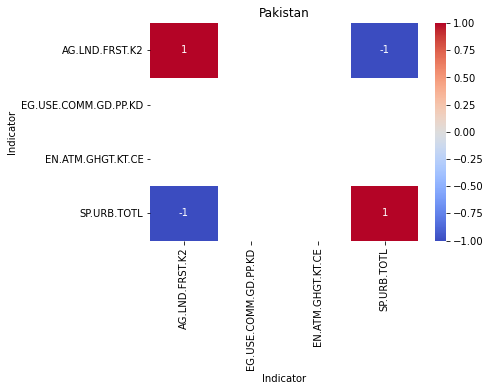

In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('H:/dataset/WorldBank/API_19_DS2_en_csv_v2_5361599.csv', skiprows=4)

# Subset to the indicators of interest
df = df[df['Indicator Code'].isin(['SP.URB.TOTL', 'SP.RUR.TOTL', 'AG.LND.FRST.K2', 'AG.LND.ARBL.HA', 'NY.GDP.MKTP.CD', 'EN.ATM.GHGT.KT.CE', 'EG.USE.COMM.GD.PP.KD'])]

# Subset to Pakistan and years 1960-2020 in 20 year increments
years = list(range(1960, 2021, 20))
df = df.loc[df['Country Code']=='PAK', ['Indicator Code'] + [str(year) for year in years]]

# Pivot the data to create a multi-index DataFrame
df = df.set_index('Indicator Code').stack().reset_index()
df.columns = ['Indicator', 'Year', 'Value']

# Create a pivot table with values by year and indicator
values_pivot = df.pivot(index='Year', columns='Indicator', values='Value')

# Calculate the correlation matrix
corr_matrix = values_pivot.corr()

# Create the heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Pakistan')
plt.show()
